# Inspect Rich Documents with Gemini Multimodality and Multimodal RAG Challenge Lab

__Note__: if you encounter an authentication error when running the cells in the notebook, go to __Vertex AI__ > __Dashboard__, and click on __Enable All Recommended APIs__. Then, re-run the failed cell, and continue the lab.  

## Setup and requirements

### Install Gen AI SDK for Python and other dependencies

Run the following four cells below before you get to Task 1. Be sure to add your current project ID to the cell titled __Define Google Cloud project information__. 

In [1]:
# "RUN THIS CELL AS IS"

# Install required python packages and other dependencies
%pip install --upgrade --quiet google-genai
%pip install --quiet pymupdf

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Restart current runtime

You must restart the runtime in order to use the newly installed packages in this Jupyter runtime. You can do this by running the cell below, which will restart the current kernel.


In [2]:
# "RUN THIS CELL AS IS"

import IPython

# Restart the kernel after libraries are loaded.

app = IPython.Application.instance()
app.kernel.do_shutdown(True)


{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>

### Define Google Cloud project information

In [1]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

PROJECT_ID = "Project ID"  # @param {type:"string"}
LOCATION = "Your Location"  # @param {type:"string"}

### Initialize Gen AI

Initialize the Gen AI SDK for Python for your project:

In [2]:
# "RUN THIS CELL AS IS"

# Initialize Gen AI.
from google import genai
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)


## Task 1. Generating Multimodal Insights with Gemini

Gemini is multimodal model that supports multimodal prompts. You can include text, image(s), and video in your prompt requests and get text or code responses.

To complete Task 1, follow the instructions at the top of each notebook cell:
* Run the cells with the comment "RUN THIS CELL AS IS".
* Complete and run the cells with the comment "COMPLETE THE MISSING PART AND RUN THIS CELL".

__Note__: Ensure you can see the weather related data in the response that is printed.


### Setup and requirements for Task 1

#### Import libraries

In [3]:
from vertexai.generative_models import GenerationConfig, GenerativeModel, Image, Part

#### Load Gemini 2.0 Flash Model

In [4]:
# "RUN THIS CELL AS IS"

multimodal_model = GenerativeModel("gemini-2.0-flash-001")

#### Define helper functions

In [5]:
# "RUN THIS CELL AS IS"

import http.client
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def display_content_as_image(content: str | Image | Part) -> bool:
    if not isinstance(content, Image):
        return False
    display_images([content])
    return True


def display_content_as_video(content: str | Image | Part) -> bool:
    if not isinstance(content, Part):
        return False
    part = typing.cast(Part, content)
    file_path = part.file_data.file_uri.removeprefix("gs://")
    video_url = f"https://storage.googleapis.com/{file_path}"
    IPython.display.display(IPython.display.Video(video_url, width=600))
    return True


def print_multimodal_prompt(contents: list[str | Image | Part]):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if display_content_as_image(content):
            continue
        if display_content_as_video(content):
            continue
        print(content)

### Task 1.1. Image understanding across multiple images

In [7]:
# "RUN THIS CELL AS IS"

# You're going to work with provided variables in this task. 
# First, review and describe the content/purpose of each variable below. 

image_ask_first_1_url = "https://storage.googleapis.com/spls/gsp520/Google_Branding/Ask_first_1.png"
image_dont_do_this_1_url = "https://storage.googleapis.com/spls/gsp520/Google_Branding/Dont_do_this_1.png"
image_ask_first_1 = load_image_from_url(image_ask_first_1_url)
image_dont_do_this_1 = load_image_from_url(image_dont_do_this_1_url)

instructions = "Instructions: Consider the following image that contains text:"
prompt1 = "What is the title of this image"
prompt2 = """
Answer the question through these steps:
Step 1: Identify the title of each image by using the filename of each image.
Step 2: Describe the image.
Step 3: For each image, describe the actions that a user is expected to take.
Step 4: Extract the text from each image as a full sentence.
Step 5: Describe the sentiment for each image with an explanation.

Answer and describe the steps taken:
"""

#### Create an input for the multimodal model

In [8]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Now, you're going to create an input for your multimodal model. Create your contents list using the variables above. Ensure the structure matches the format expected by the multimodal model.

contents = [instructions,prompt1,image_ask_first_1,image_dont_do_this_1,prompt2]

#### Generate responses from the multimodal model

In [9]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the next part of this task, you're going to generate responses from the multimodal model. Capture the output of the model in the "responses" variable by using your "contents" list.

responses = multimodal_model.generate_content(contents, stream=True)

#### Display the prompt and responses


In [10]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the last part of this task, you're going to print your contents and responses with the prompt and responses title provided. Use descriptive titles to help organize the output (e.g., "Prompts", "Model Responses") and then display the prompt and responses by using the print() function. 

# Hint: "\n" inserts a newline character for clearer separation between the sections.

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")



-------Response--------
Here's an analysis of the images, following the steps you outlined:

**Image 1**

**Step 1: Identify the title of each image by using the filename of each image.**

Based on the information provided below the image, the title is "Product icons."

**Step 2: Describe the image.**

The image shows the logo for a product called "SYSTEMERGER." The logo is a stylized design of two interlocking blue shapes.  Below the logo is the tagline "Merge your system workflow to make your job easier." Further below is a line stating "works with apps like these:" followed by logos of Gmail, Google Calendar, and Google Drive.

**Step 3: For each image, describe the actions that a user is expected to take.**

The user is directed to refer to "icon usage guidelines" for information on using product icons in association with their business.

**Step 4: Extract the text from each image as a full sentence.**

*   Refer to our icon usage guidelines to see whether you can use certain prod

### To verify your work for Task 1.1, click __Check my progress__ in the lab instructions.

### Task 1.2. Similarity/Differences between images

#### Explore the variables of the task

In [12]:
# "RUN THIS CELL AS IS"

# You're going to work with provided variables in this task. First, review and describe the content/purpose of each variable below. 


image_ask_first_3_url = "https://storage.googleapis.com/spls/gsp520/Google_Branding/Ask_first_3.png"
image_dont_do_this_3_url =  "https://storage.googleapis.com/spls/gsp520/Google_Branding/Dont_do_this_3.png"
image_ask_first_3 = load_image_from_url(image_ask_first_3_url)
image_dont_do_this_3 = load_image_from_url(image_dont_do_this_3_url)

prompt1 = """
Consider the following two images:
Image 1:
"""
prompt2 = """
Image 2:
"""
prompt3 = """
1. What is shown in Image 1 and Image 2?
2. What is similar between the two images?
3. What is difference between Image 1 and Image 2 in terms of the text ?
"""



#### Create an input for the multimodal model

In [13]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Now, you're going to create an input for your multimodal model. Create your contents list using the variables above. Ensure the structure matches the format expected by the multimodal model.

contents = [prompt1,image_ask_first_3,prompt2,image_dont_do_this_3,prompt3]

#### Set configuration parameters

In [14]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Now, you're going to set configuration parameters that will influence how the multimodal model generates text. These settings control aspects like the creativity and focus of the responses. Here's how:
# Temperature: Controls randomness. Lower values mean more predictable results, higher values mean more surprising and creative output
# Top p / Top k: Affects how the model chooses words. Explore different values to see how they change the results.
# Other parameters: Check the model's documentation for additional options you might want to adjust.

# Store your configuration parameters in a generation_config variable. This improves reusability, allowing you to easily apply the same settings across tasks and make adjustments as needed.

generation_config = GenerationConfig(
    temperature=0.0,
    top_p=0.8,
    top_k=40,
    candidate_count=1,
    max_output_tokens=2048,
)


#### Generate responses from the multimodal model


In [17]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the next part of this task, you're going to generate responses from a multimodal model. capture the output of the model in the "responses" variable by using your "contents" list and the confiuguration settings.


responses = multimodal_model.generate_content(
    contents,
    generation_config=generation_config,
    stream=True,
)


#### Display the prompt and responses

-------Prompt-------

Consider the following two images:
Image 1:



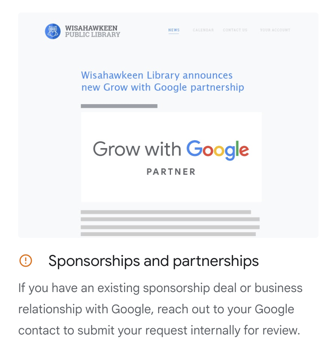


Image 2:



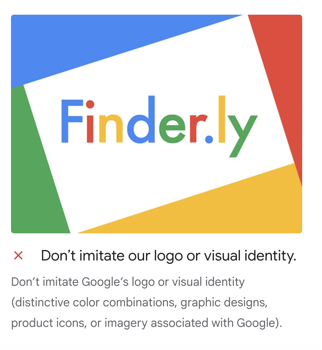


1. What is shown in Image 1 and Image 2?
2. What is similar between the two images?
3. What is difference between Image 1 and Image 2 in terms of the text ?


-------Response-------
Here's a breakdown of the images:

**1. What is shown in Image 1 and Image 2?**

*   **Image 1:** Shows a library's announcement of a partnership with Google's "Grow with Google" program. It includes the library's logo, the "Grow with Google Partner" logo, and a text excerpt about sponsorships and partnerships with Google.
*   **Image 2:** Shows the "Finder.ly" logo with a warning not to imitate Google's logo or visual identity. The text explains that this includes distinctive color combinations, graphic designs, product icons, or imagery associated with Google.

**2. What is similar between the two images?**

*   **Both images relate to Google:** Both images either directly show a Google partnership or discuss Google's branding guidelines.
*   **Both images contain text:** Both images contain text that pr

In [18]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the last part of this task, you're going to print your contents and responses with the prompt and responses title provided. Use descriptive titles to help organize the output (e.g., "Prompts", "Model Responses") and then display the prompt and responses by using the print() function. 

# Hint: "\n" inserts a newline character for clearer separation between the sections.

print("-------Prompt-------")
print_multimodal_prompt(contents)

print("\n-------Response-------")
for response in responses:
    print(response.text, end="")

### To verify your work for Task 1.2, click __Check my progress__ in the lab instructions.

### Task 1.3. Generate a video description

#### Explore the variables of the task


In [19]:
# "RUN THIS CELL AS IS"

# You're going to work with provided variables in this task. 
# First, review and describe the content/purpose of each variable below. 


prompt = """
What is the product shown in this video?
What specific product features are highlighted in the video?
Where was this video filmed? Which cities around the world could potentially serve as the background in the video?
What is the sentiment of the video?
"""
video = Part.from_uri(
    uri="gs://spls/gsp520/google-pixel-8-pro.mp4",
    mime_type="video/mp4",
)

#### Create an input for the multimodal model

In [21]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Now, you're going to create an input for your multimodal model. Create your contents list using the variables above. Ensure the structure matches the format expected by the multimodal model.

contents = [prompt,video]

#### Generate responses from the multimodal model

In [22]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the next part of this task, you're going to generate responses from a multimodal model. Capture the output of the model in the "responses" variable by using your "contents" list.


responses = multimodal_model.generate_content(contents, stream=True)

#### Display the prompt and responses

**Note:** If you encounter any authentication error below cell run, go to the **Navigation menu**, click **Vertex AI > Dashboard**, then click **"Enable all Recommended APIs"** Now, go back to cell 16, and run cells 16, 17 and below cell.

In [23]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the last part of this task, you're going to print your contents and responses with the prompt and responses title provided. Use descriptive titles to help organize the output (e.g., "Prompts", "Model Responses") and then display the prompt and responses by using the print() function. 

# Hint: "\n" inserts a newline character for clearer separation between the sections.

print("-------Prompt-------")
print_multimodal_prompt(contents)

print("\n-------Response-------")
for response in responses:
    print(response.text, end="")

-------Prompt-------

What is the product shown in this video?
What specific product features are highlighted in the video?
Where was this video filmed? Which cities around the world could potentially serve as the background in the video?
What is the sentiment of the video?




-------Response-------
Here's an analysis of the video:

*   **Product:** The video is advertising the Google Pixel 8 Pro smartphone.
*   **Highlighted Features:**
    *   AI-enhanced photo editing capabilities, specifically the "Magic Eraser" tool.
    *   Audio editing to reduce noise and highlight speech in videos.
    *   Group photo optimization to ensure everyone is smiling in the final shot.
    *   Object removal tool.
*   **Filming Location:** The video appears to be filmed in London, England. The architecture in the background is characteristic of the city.
    *   Other cities with similar architecture and could potentially serve as a backdrop include:
        *   Paris, France
        *   Rome, Italy
        *   Berlin, Germany
        *   New York City, USA
*   **Sentiment:** The video has a positive and playful sentiment. It uses upbeat music and energetic visuals to showcase the fun and creative possibilities of the phone's features. The tone is modern and aims to appea

Proceed to Task 1.4 below (no progress check for Task 1.3 in lab instructions). 

### Task 1.4. Extract tags of objects throughout the video

#### Explore the variables of the task

In [40]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# You're going to work with provided variables in this task. First, review and describe the content/purpose of each variable below. 

prompt = """
Answer the following questions using the video only:

Which particular sport is highlighted in the video?
What values or beliefs does the advertisement communicate about the brand?
What emotions or feelings does the advertisement evoke in the audience?
Which tags associated with objects featured throughout the video could be extracted?
"""
video = Part.from_uri(
    uri="gs://spls/gsp520/google-pixel-8-pro.mp4",
    mime_type="INSERT CORRECT MIME TYPE",
)

#### Create an input for the multimodal model

In [41]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Now, you're going to create an input for your multimodal model. Create your contents list using the variables above. Ensure the structure matches the format expected by the multimodal model.

contents = [prompt,video]

#### Generate responses from the multimodal model

In [42]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the next part of this task, you're going to generate responses from a multimodal model. capture the output of the model in the "responses" variable by using your "contents" list and video input.


responses = multimodal_model.generate_content(contents, stream=True)

#### Display the prompt and responses

In [45]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the last part of this task, you're going to print your contents and responses with the prompt and responses title provided. Use descriptive titles to help organize the output (e.g., "Prompts", "Model Responses") and then display the prompt and responses by using the print() function. 

# Hint: "\n" inserts a newline character for clearer separation between the sections.

print("-------Prompt-------")
print_multimodal_prompt(contents)

print("\n-------Response-------")
for response in responses:
    print(response, end="")

-------Prompt-------

Answer the following questions using the video only:

Which particular sport is highlighted in the video?
What values or beliefs does the advertisement communicate about the brand?
What emotions or feelings does the advertisement evoke in the audience?
Which tags associated with objects featured throughout the video could be extracted?




-------Response-------


Proceed to Task 1.5 below (no progress check for Task 1.4 in lab instructions). 

### Task 1.5. Ask more questions about a video

**Note:** Although this video contains audio, Gemini does not currently support audio input and will only answer based on the video.

#### Explore the variables of the task

In [52]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# You're going to work with provided variables in this task. 
# First, review and describe the content/purpose of each variable below. 


prompt = """
Answer the following questions using the video only:

How does the advertisement portray the use of technology, specifically AI, in capturing and preserving memories?
What visual cues or storytelling elements contribute to the nostalgic atmosphere of the advertisement?
How does the advertisement depict the role of friendship and social connections in enhancing experiences and creating memories?
Are there any specific features or functionalities of the phone highlighted in the advertisement, besides its AI capabilities?

Provide the answer JSON.
"""
video = Part.from_uri(
    uri="gs://spls/gsp520/google-pixel-8-pro.mp4",
    mime_type="video/mp4",
)


#### Create an input for the multimodal model

In [53]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Now, you're going to create an input for your multimodal model. Create your contents list using the variables above. Ensure the structure matches the format expected by the multimodal model.

contents = [prompt,video]

#### Generate responses from the multimodal model

In [54]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the next part of this task, you're going to generate responses from a multimodal model. capture the output of the model in the "responses" variable by using your "contents" list and video input.


responses = multimodal_model.generate_content(contents, stream=True)

#### Display the prompt and responses

In [55]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the last part of this task, you're going to print your contents and responses with the prompt and responses title provided. Use descriptive titles to help organize the output (e.g., "Prompts", "Model Responses") and then display the prompt and responses by using the print() function. 

# Hint: "\n" inserts a newline character for clearer separation between the sections.

print("-------Prompt-------")
print_multimodal_prompt(contents)

print("\n-------Response-------")
for response in responses:
    print(response.text, end="")

-------Prompt-------

Answer the following questions using the video only:

How does the advertisement portray the use of technology, specifically AI, in capturing and preserving memories?
What visual cues or storytelling elements contribute to the nostalgic atmosphere of the advertisement?
How does the advertisement depict the role of friendship and social connections in enhancing experiences and creating memories?
Are there any specific features or functionalities of the phone highlighted in the advertisement, besides its AI capabilities?

Provide the answer JSON.




-------Response-------
```json
{
  "AI_Portrayal": "The advertisement portrays AI as a tool to enhance captured memories. It uses AI to erase unwanted objects from photos, capture the best expressions in group shots, and clarify sounds in videos by isolating speech from background noise.",
  "Nostalgia": "The visual cues contributing to the nostalgic atmosphere include the use of everyday moments like taking photos with friends and family, and capturing the simple joys of life. The focus is on capturing moments that can be looked back on fondly, implying a sense of nostalgia for those times.",
  "Friendship_SocialConnections": "The advertisement depicts friendship and social connections through scenes of friends taking selfies together in a field and on a basketball court, highlighting the phone's ability to capture these moments effectively and ensure everyone looks their best. These scenes emphasize the importance of shared experiences and capturing them with loved ones.",
  "Phone_

Proceed to Task 1.6 below (no progress check for Task 1.5 in lab instructions). 

### Task 1.6. Retrieve extra information beyond the video

#### Explore the variables of the task

In [56]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# You're going to work with provided variables in this task. 
# First, review and describe the content/purpose of each variable below. 


prompt = """
Answer the following questions using the video only:

How does the advertisement appeal to its target audience through its messaging and imagery?
What overall message or takeaway does the advertisement convey about the brand and its products?
Are there any symbolic elements or motifs used throughout the advertisement to reinforce its central themes?
What is the best hashtag for this video based on the description ?

"""
video = Part.from_uri(
    uri="https://storage.googleapis.com/spls/gsp520/google-pixel-8-pro.mp4",
    mime_type="video/mp4",
)

#### Create an input for the multimodal model

In [57]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Now, you're going to create an input for your multimodal model. Create your contents list using the variables above. Ensure the structure matches the format expected by the multimodal model.

contents =[prompt,video]

#### Generate responses from the multimodal model

In [58]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the next part of this task, you're going to generate responses from a multimodal model. capture the output of the model in the "responses" variable by using your "contents" list and video input.


responses = multimodal_model.generate_content(contents, stream=True)

#### Display the prompt and responses

In [59]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# In the last part of this task, you're going to print your contents and responses with the prompt and responses title provided. Use descriptive titles to help organize the output (e.g., "Prompts", "Model Responses") and then display the prompt and responses by using the print() function. 

# Hint: "\n" inserts a newline character for clearer separation between the sections.

print("-------Prompt-------")
print_multimodal_prompt(contents)

print("\n-------Response-------")
for response in responses:
    print(response.text, end="")

-------Prompt-------

Answer the following questions using the video only:

How does the advertisement appeal to its target audience through its messaging and imagery?
What overall message or takeaway does the advertisement convey about the brand and its products?
Are there any symbolic elements or motifs used throughout the advertisement to reinforce its central themes?
What is the best hashtag for this video based on the description ?





-------Response-------
Okay, here are the answers to your questions based on the provided video:

*   **How does the advertisement appeal to its target audience through its messaging and imagery?**

The advertisement uses images and sounds of people in the city, parks, and homes, interacting with each other. The target audience is also shown through people of different ages, colors, and genders. The features of the product, like removing people from the background, editing sounds, and making everyone smile are showcased.

*   **What overall message or takeaway does the advertisement convey about the brand and its products?**

The overall message is that the Google Pixel 8 Pro has powerful AI features that make it easy to take, edit, and enhance your photos and videos. The takeaway is that the phone can improve photos with the "Magic Eraser", and remove noises while taking videos and editing.

*   **Are there any symbolic elements or motifs used throughout the advertisement to reinforc

### To verify your work for Task 1.6, click __Check my progress__ in the lab instructions.

## Task 2. Retrieving and integrating knowledge with multimodal retrieval augmented generation (RAG)

To complete Task 2, follow the instructions at the top of each notebook cell:
* Run the cells with the comment "RUN THIS CELL AS IS".
* Complete and run the cells with the comment "COMPLETE THE MISSING PART AND RUN THIS CELL".

For additional information about the available data and helper functions for Task 2, review the section named __Available data and helper functions for Task 2__ in the lab instructions.

### Setup and requirements for Task 2

#### Import libraries

In [60]:
# "RUN THIS CELL AS IS"

# Import necessary packages and libraries.

from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)


#### Load the Gemini 2.0 Flash model

In [61]:
# "RUN THIS CELL AS IS"

# Load the Gemini 2.0 Flash model.

multimodal_model = GenerativeModel("gemini-2.0-flash-001")

#### Download custom Python modules and utilities 

The cell below will download some helper functions needed for this notebook, to improve readability. You can also view the code (`intro_multimodal_rag_utils.py`) directly on [GitHub](https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/intro_multimodal_rag_utils.py).

In [62]:
# "RUN THIS CELL AS IS"

# Import necessary packages and libraries.
import os
import urllib.request
import sys

if not os.path.exists("utils"):
    os.makedirs("utils")


# Download the helper scripts from utils folder.
url_prefix = "https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/"
files = ["intro_multimodal_rag_utils.py"]

for fname in files:
    urllib.request.urlretrieve(f"{url_prefix}/{fname}", filename=f"utils/{fname}")


#### Get documents and images from Cloud Storage

In [63]:
# "RUN THIS CELL AS IS"

# Download documents and images used in this notebook.

!gsutil -m rsync -r gs://spls/gsp520 .
print("Download completed")

Building synchronization state...
Starting synchronization...
Copying gs://spls/gsp520/Google_Branding/Ask_first_3.png...
Copying gs://spls/gsp520/Google_Branding/Ask_first_1.png...                     
Copying gs://spls/gsp520/Google_Branding/.DS_Store...                           
Copying gs://spls/gsp520/Google_Branding/Dont_do_this_2.png...                  
Copying gs://spls/gsp520/Google_Branding/Ask_first_2.png...                     
Copying gs://spls/gsp520/Google_Branding/Go_for_it_1.png...                     
Copying gs://spls/gsp520/Google_Branding/Dont_do_this_3.png...                  
Copying gs://spls/gsp520/Google_Branding/Dont_do_this_5.png...                  
Copying gs://spls/gsp520/Google_Branding/Dont_do_this_4.png...                  
Copying gs://spls/gsp520/Google_Branding/Dont_do_this_1.png...                  
Copying gs://spls/gsp520/Google_Branding/Dont_do_this_6.png...                  
Copying gs://spls/gsp520/Google_Branding/Go_for_it_2.png...         

### Task 2.1. Build metadata of documents containing text and images

__Note__: These steps may take a few minutes to complete.

#### Import helper functions to build metadata

In [64]:
# "RUN THIS CELL AS IS"

# Import helper functions from utils.
from utils.intro_multimodal_rag_utils import get_document_metadata

#### Explore the variables of the task

In [65]:
# "RUN THIS CELL AS IS"

# You're going to work with provided variables in this task. 
# First, review and describe the content/purpose of each variable below. 


# Specify the "PDF folder path" with single PDF and "PDF folder" with multiple PDF.

pdf_folder_path = "Google_Branding/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
image_description_prompt = """Explain what is going on in the image.
If it's a table, extract all elements of the table.
If it's a graph, explain the findings in the graph.
Do not include any numbers that are not mentioned in the image.
"""


#### Extract and store metadata of text and images from a document

In [66]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Call the "get_document_metadata" function from the utils file to extract text and image metadata from the PDF document. Store the results in two different DataFrames: "text_metadata_df" and "image_metadata_df".  
# text_metadata_df: This will contain extracted text snippets, their corresponding page numbers, and potentially other relevant information.
# image_metadata_df: This will contain descriptions of the images found in the PDF (if any), along with their location within the document.

text_metadata_df, image_metadata_df =  get_document_metadata(
    multimodal_model, 
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
)

print("\n\n --- Completed processing. ---")



 Processing the file: --------------------------------- Google_Branding/Google_terms_of_service_en_us.pdf 


Processing page: 1
Processing page: 2
Processing page: 3
Processing page: 4
Processing page: 5
Processing page: 6
Processing page: 7
Processing page: 8
Processing page: 9
Processing page: 10
Processing page: 11
Processing page: 12
Processing page: 13
Processing page: 14
Processing page: 15
Processing page: 16


 --- Completed processing. ---


#### Inspect the processed text metadata

In [67]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Explore the text_metadata_df dataframe by displaying the first few rows of the dataframe.

text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,Google_terms_of_service_en_us.pdf,1,"GOOGLE TERMS OF SERVICE\nEffective January 5, ...","[-0.012991457246243954, 0.00233408878557384, 0...",1,"GOOGLE TERMS OF SERVICE\nEffective January 5, ...","[-0.005565959494560957, 0.0008999718702398241,..."
1,Google_terms_of_service_en_us.pdf,1,"GOOGLE TERMS OF SERVICE\nEffective January 5, ...","[-0.012991457246243954, 0.00233408878557384, 0...",2,"ongs to you, Google, or others\nIn case of pro...","[-0.02242434397339821, -0.02287789061665535, -..."
2,Google_terms_of_service_en_us.pdf,2,"Google services are provided by, and youre con...","[-0.027467481791973114, -0.03269978240132332, ...",1,"Google services are provided by, and youre con...","[-0.030542202293872833, -0.03709811717271805, ..."
3,Google_terms_of_service_en_us.pdf,2,"Google services are provided by, and youre con...","[-0.027467481791973114, -0.03269978240132332, ...",2,\nto use our services if you agree to follow t...,"[-0.010060024447739124, -0.006401533726602793,..."
4,Google_terms_of_service_en_us.pdf,3,apps and sites (like Search and Maps)\nplatfor...,"[-0.024841992184519768, -0.016507208347320557,...",1,apps and sites (like Search and Maps)\nplatfor...,"[-0.022818822413682938, -0.026401124894618988,..."


#### Import the helper functions to implement RAG

In [68]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Import helper functions from utils.

from utils.intro_multimodal_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
)

Proceed to Task 2.2 below (no progress check for Task 2.1 in lab instructions). 

### Task 2.2. Create a user query

#### Explore the variables of the task

In [69]:
# "RUN THIS CELL AS IS"

# You're going to work with provided variables in this task. 
# First, review and describe the content/purpose of each variable below. 

query = """Questions:
 - What are the key expectations that users can have from Google regarding the provision and development of its services?
- What specific rules and guidelines are established for users when using Google services?
- How does Google handle intellectual property rights related to the content found within its services, including content owned by users, Google, and third parties? 
- What legal rights and remedies are available to users in case of problems or disagreements with Google?
- How do the service-specific additional terms interact with these general Terms of Service, and which terms take precedence in case of any conflicts?
 """

Proceed to Task 2.3 below (no progress check for Task 2.2 in lab instructions).

### Task 2.3. Get all relevant text chunks

#### Retrieve relevant chunks of text based on the query

In [70]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Call the "get_similar_text_from_query" function from the utils file to retrieve relevant chunks of text based on the query. Store the results in a dictionary called "matching_results_chunks_data".  
# matching_results_chunks_data: This dictionary will contain file_name, page_num, cosine_score, chunk_number and chunk_score. The dictionary represents a search result for a query related to the text_metadata_df.

matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=10,
    chunk_text=True,
)


#### Display the first item of the text chunk dictionary

In [71]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Explore the first item in your matching_results_chunks_data dictionary by displaying the first item.

print_text_to_text_citation(
    matching_results_chunks_data,
    print_top=False,
    chunk_text=True,
)

Citation 1: Matched text:
Score: 0.87
File name: Google_terms_of_service_en_us.pdf
Page: 1
Page number: 1
Chunk number: 1
Chunk text: GOOGLE TERMS OF SERVICE
Effective January 5, 2022
Archived versions
Whats covered in these terms
We know its tempting to skip these Terms of Service, but
its important to establish what you can expect from us as
you use Google services, and what we expect from you.
These Terms of Service reflect the way Googles business works, the laws that apply to our company, and
certain things weve always believed to be true. As a result, these Terms of Service help define Googles
relationship with you as you interact with our services. For example, these terms include the following topic
headings:
What you can expect from us, which describes how we provide and develop our services
What we expect from you, which establishes certain rules for using our services
Content in Google services, which describes the intellectual property rights to the content you find in our


Proceed to Task 2.4 below (no progress check for Task 2.3 in lab instructions).

### Task 2.4. Create context text

#### Create a list to store the combined chunks of text

In [72]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"


# Create an empty list named "context_text". This list will be used to store the combined chunks of text.
context_text =[]


#### Iterate through each item in the text chunks dictionary

In [73]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Create a for loop to iterate through each item in the matching_results_chunks_data dictionary in order to combine all the selected relevant text chunks

for key, value in matching_results_chunks_data.items():
    context_text.append(value["chunk_text"]) 


#### Join all the text chunks and store in a list

In [74]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Take all of the individual text chunks stored in the context_text list and join them together into a single string named final_context_text. Use "\n" part inserts a newline character between each chunk, effectively creating separate lines or paragraphs.

final_context_text = "\n".join(context_text)

Proceed to Task 2.5 below (no progress check for Task 2.4 in lab instructions).

### Task 2.5. Pass context to Gemini

#### Explore the variables of the task


In [75]:
# "RUN THIS CELL AS IS"

# You're going to work with provided variables in this task. First, review and describe the content/purpose of each variable below. 

prompt = f""" Instructions: Compare the images and the text provided as Context: to answer multiple Question:
Make sure to think thoroughly before answering the question and put the necessary steps to arrive at the answer in bullet points for easy explainability.
If unsure, respond, "Not enough context to answer".

Context:
 - Text Context:
 {final_context_text}


{query}

Answer:
"""

#### Generate Gemini response with streaming output

In [76]:
# "COMPLETE THE MISSING PART AND RUN THIS CELL"

# Call "get_gemini_response" function from utils module in order to generate Gemini response with streaming output. This function uses a multimodal Gemini model, a text prompt, and configuration parameters and instructs the Gemini model to generate a response using the provided prompt. As Gemini model enables streaming, you will receive chunks of the response as they were produced. 
# Format the streamed output using Markdown syntax for easy readability and conversion to HTML.

Markdown(
    get_gemini_response(
        multimodal_model,
        model_input=[prompt],
        stream=True,
        generation_config=GenerationConfig(temperature=0.2, max_output_tokens=2048),
    )
)

Here's a breakdown of the answers to your questions, based on the provided Google Terms of Service excerpt:

*   **What are the key expectations that users can have from Google regarding the provision and development of its services?**

    *   Google provides a broad range of useful services.
    *   Google will provide reasonable advance notice of material changes that negatively impact the use of services or if they stop offering a service, except in urgent situations.
    *   Google will provide an opportunity to export content from a Google Account using Google Takeout, subject to applicable law and policies.
    *   Google may update its services, including adding or removing features and technologies.
    *   Google may send service announcements and other information.

*   **What specific rules and guidelines are established for users when using Google services?**

    *   Users must follow the Terms of Service and any service-specific additional terms, including age requirements.
    *   Users must comply with applicable laws, including export control, sanctions, and human trafficking laws.
    *   Users must respect the rights of others, including privacy and intellectual property rights.
    *   Users must not abuse or harm others or themselves (or threaten or encourage such abuse or harm).
    *   Users must ensure they have the necessary rights to upload or share content and that the content is lawful.

*   **How does Google handle intellectual property rights related to the content found within its services, including content owned by users, Google, and third parties?**

    *   Users retain intellectual property rights in their content.
    *   Google requires permission (a license) to use user content if intellectual property rights restrict their use. This license lasts as long as the content is protected by intellectual property rights.
    *   If a user removes content, Google's systems will stop making it publicly available in a reasonable time, with exceptions for content already shared or available through other services.
    *   Google may use publicly shared content to promote its services.

*   **What legal rights and remedies are available to users in case of problems or disagreements with Google?**

    *   Users have certain legal rights that cannot be limited by the Terms of Service.
    *   Google is liable only for its breaches of the terms or applicable service-specific additional terms.
    *   Google isn't liable for loss of profits, revenues, business opportunities, goodwill, or anticipated savings; indirect or consequential losses; or punitive damages.
    *   Google's total liability is limited to the greater of $200 or the fees paid for the relevant services in the 12 months before the dispute.
    *   Business users and organizations must indemnify Google for third-party legal proceedings arising from their unlawful use of the services or violation of the terms.

*   **How do the service-specific additional terms interact with these general Terms of Service, and which terms take precedence in case of any conflicts?**

    *   Service-specific additional terms exist and could include things like additional age requirements.
    *   If the general Terms of Service conflict with the service-specific additional terms, the additional terms will govern for that service.


### To verify your work for Task 2.5, click __Check my progress__ in the lab instructions.